<a href="https://colab.research.google.com/github/nilijing/Earnings_Call_Analyzed_By_NLP/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Setup
!pip install selenium
!pip install yfinance
!pip install wordcloud
!pip install nameparser
!pip install sumy
!apt install chromium-chromedriver

In [ ]:
!cp /usr/lib/chromium-browser/chromedriver /usr/bin  #update Chrome Driver folder 

cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
import warnings
warnings.filterwarnings("ignore")

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

import requests
import time
from bs4 import BeautifulSoup

import os
import numpy as np
from selenium import webdriver
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.actions.interaction import KEY
from selenium.webdriver.common import keys
import json
import yfinance as yf
from nltk import sent_tokenize
from collections import Counter 

#from nltk.tag.stanford import CoreNLPNERTagger
#import SpeechToText as STT 
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Earnings_call_NLP')

import TranscriptCollector as TC
import FeatureMining_Utilities as FUtil
import stockinfocollector as SIC

#1.General Info of Specific Companies

In [ ]:
Stock_Tickers=pd.read_excel(open('/content/drive/MyDrive/Earnings_call_NLP/Stoc_industries.xlsx', 'rb'),sheet_name='Test')
#find Sector,Industry and etc. for the stock
dfContent=SIC.Get_from_Yahoo(Stock_Tickers)  
dfContent=SIC.Get_from_EOD(Stock_Tickers['Symbol']) 

print(dfContent)

MSFT
getting page http://eoddata.com/stocklist/NASDAQ/M.htm
attempting to grab page: http://eoddata.com/stockquote/NASDAQ/MSFT.htm
                                  Industry  ...       StockName
0  Computer Software: Prepackaged Software  ...  Microsoft Corp

[1 rows x 4 columns]


#2.Get Transcripts of Earnings Calls and Stock Returns for Companies you want to follow.

**#2.1 Get Transcripts**

In [ ]:
#we set to obtain the latest 12 transcripts for each company and they will be saved in the folder named 'Earnings_call_NLP/AlphaStreet/S&P 500' separately group by company name.
TC.Get_Transcripts(Stock_Tickers)

******Getting Transcripts for:MSFT
getting page https://alphastreet.com/earnings/earnings-call-transcripts?ticker=MSFT
attempting to grab page: https://alphastreet.com//earnings/earnings-call-transcripts/2021/01/26/508313-microsoft-corporation-nasdaq-msft-q2-2021-earnings-conference-call?source_url=https%3A%2F%2Falphastreet.com%2Fearnings%2Fearnings-call-transcripts%3Fticker%3DMSFT
filename: Microsoft Corporation_Q2 2021
microsoft corporation_q2 2021 sucessfully saved
attempting to grab page: https://alphastreet.com//earnings/earnings-call-transcripts/2020/10/27/498489-microsoft-corporation-nasdaq-msft-q1-2021-earnings-conference-call?source_url=https%3A%2F%2Falphastreet.com%2Fearnings%2Fearnings-call-transcripts%3Fticker%3DMSFT
Folder exists
filename: Microsoft Corporation_Q1 2021
microsoft corporation_q1 2021 sucessfully saved
attempting to grab page: https://alphastreet.com//earnings/earnings-call-transcripts/2020/07/22/486461-microsoft-corporation-nasdaq-msft-q4-2020-earnings-confe

**#2.2 Get Historical Prices and Returns**

In [ ]:
#Note: Adjust Returns based on the timing of the speech also take a list of all competitors
Stock_Data={}
for i in range(len(Stock_Tickers)):
  ticker=Stock_Tickers['Symbol'][i]
  Stock_Data[ticker] = pd.DataFrame()
  msft = yf.Ticker(ticker)
  temp=msft.history(period="4Y")
  temp.index = pd.to_datetime(temp.index).date
  #Link of Paper and dynamic logic for returns calculuation
  temp['Returns']= np.log(temp['Close']) - np.log(temp['Open'])
  Stock_Data[ticker] = temp

print(Stock_Data)

{'MSFT':                   Open        High  ...  Stock Splits   Returns
2017-02-06   59.535809   59.676446  ...             0  0.002202
2017-02-07   59.760829   59.798329  ...             0 -0.004875
2017-02-08   59.601440   59.826459  ...             0 -0.003625
2017-02-09   59.554562   60.417130  ...             0  0.008465
2017-02-10   60.238997   60.285879  ...             0 -0.003899
...                ...         ...  ...           ...       ...
2021-01-29  235.990005  238.020004  ...             0 -0.017224
2021-02-01  235.059998  242.500000  ...             0  0.019339
2021-02-02  241.300003  242.309998  ...             0 -0.007446
2021-02-03  239.570007  245.089996  ...             0  0.014216
2021-02-04  242.660004  243.199997  ...             0 -0.002682

[1007 rows x 8 columns]}


#3.Quick Review of Content(Keywords and summarized content)

In [ ]:
# #Find file directory for the specific company
directory={}
for i in range(len(Stock_Tickers)):
  symbol=Stock_Tickers['Symbol'][i] 
  directory[symbol] = pd.DataFrame() 
  directory[symbol] ="/content/drive/MyDrive/Earnings_call_NLP/AlphaStreet/S&P 500/" +str(ticker)  

print(directory)

{'MSFT': '/content/drive/MyDrive/Earnings_call_NLP/AlphaStreet/S&P 500/MSFT'}


**#3.1. Review based on Part of Call and Type of Content**

***3.1.1. Get topics of discussion__NN***

In [ ]:
# #Get topics of discussion__NN
df_nn=pd.DataFrame( columns={"Counts"} ) 
for i in range(len(Stock_Tickers)):
  symbol=Stock_Tickers['Symbol'][i] 
  dir=directory.get(symbol )
  for filename in os.listdir(dir):     
    filepath=os.path.join(dir,filename)
    print('***************filename:',filename)
    #NN: Noun,singular
    Description=FUtil.GetSummary( filepath,'NN','Exec Speech' )
    #Combine Results    
    df_nn,All_Details,dict_combined_NN=FUtil.CombineResults(df_nn,Description) 

#df_nnp:DataFrame of features and counts
#All_Details:Series of features and counts
#dict_combined_NNP:dict of features and counts

In [ ]:
print(dict_combined_NN)

{'ability': 9, 'acceleration': 3, 'access': 13, 'accord': 1, 'accordance': 10, 'account': 1, 'accounting': 22, 'achievement': 1, 'acquisition': 18, 'across': 1, 'action': 5, 'activity': 4, 'addition': 19, 'administration': 1, 'adopter': 1, 'adoption': 19, 'advance': 4, 'advantage': 12, 'advertising': 15, 'advocate': 1, 'afar': 1, 'afternoon': 25, 'agent': 5, 'agility': 2, 'agreement': 4, 'align': 1, 'allocation': 2, 'alongside': 1, 'ambition': 8, 'amount': 3, 'amusement': 1, 'analysis': 2, 'analyze': 2, 'annuity': 26, 'anyone': 9, 'app': 12, 'appliance': 1, 'application': 19, 'approach': 13, 'apps': 19, 'architecture': 6, 'area': 1, 'aspect': 2, 'assessment': 1, 'asset': 7, 'assistance': 2, 'attention': 1, 'attract': 3, 'attribution': 1, 'audio': 2, 'audit': 1, 'author': 1, 'auto': 1, 'automate': 2, 'automation': 12, 'availability': 2, 'average': 1, 'azure': 13, 'backbone': 1, 'backdrop': 2, 'balance': 7, 'banking': 1, 'bar': 3, 'base': 64, 'basis': 14, 'beginning': 1, 'behalf': 1, 'be

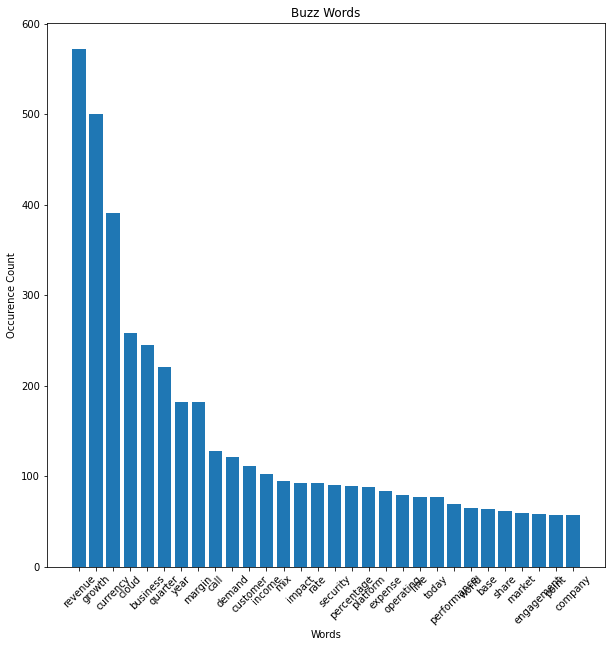

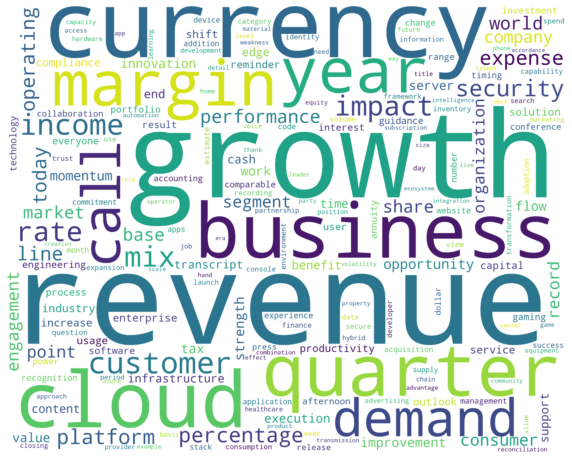

In [ ]:
# #buzzword plot and wordcloud plotPlot of NN dataset
FUtil.ResultSummary(dict_combined_NN,All_Details)

In wordclosud plot, bigger term means greater weight. Thus, the second graph vividly shows that 'currency', 'growth','revenue','cloud' and so on are the most common words mentioned in the latest 12 'MSFT' earning calls.

***3.1.2. Get words of products/Services__NNP***

In [ ]:
# #Get products/Services of the firm__NNP
df_nnp=pd.DataFrame(columns={"Counts"})
for i in range(len(directory)):
  symbol=Stock_Tickers['Symbol'][i] 
  dir=directory.get(symbol )
  for filename in os.listdir(dir):    
    filepath=os.path.join(dir,filename)
    #NNP: Proper noun,singular
    Description=FUtil.GetSummary(filepath,'NNP','Exec Speech')
    #Combine Results    
    df_nnp,All_Details,dict_combined_NNP=FUtil.CombineResults(df_nnp,Description)

In [ ]:
print(dict_combined_NNP) #A list of all words in a particular category.

{'365': 1, 'aarp': 1, 'abb': 2, 'accenture': 3, 'accord': 1, 'accounting': 13, 'across': 2, 'act': 1, 'action': 1, 'active': 7, 'administration': 1, 'adobe': 6, 'advanced': 2, 'aep': 2, 'affairs': 2, 'affirmed': 3, 'africa': 3, 'agents': 3, 'agile': 1, 'airbus': 3, 'albertsons': 1, 'alcoa': 1, 'alice': 1, 'alliance': 7, 'amd': 1, 'america': 1, 'american': 1, 'amgen': 1, 'amid': 1, 'amidst': 1, 'amy': 44, 'analytics': 2, 'anchors': 1, 'android': 4, 'angeles': 1, 'anheuser': 1, 'api': 1, 'app': 1, 'applications': 1, 'apps': 11, 'april': 2, 'arab': 2, 'arc': 6, 'arpu': 12, 'asc': 5, 'asia': 1, 'asos': 1, 'assessments': 1, 'assist': 3, 'assisted': 1, 'associates': 1, 'assuming': 4, 'atp': 2, 'attack': 1, 'australia': 3, 'austria': 1, 'autodesk': 2, 'automate': 4, 'automation': 2, 'aviation': 1, 'axa': 1, 'azure': 176, 'b2b': 1, 'b2c': 1, 'bank': 3, 'basf': 1, 'bayer': 1, 'bentley': 1, 'benz': 1, 'berkshire': 1, 'bhp': 1, 'bing': 2, 'biotechnologies': 1, 'blackrock': 3, 'block': 1, 'blue': 

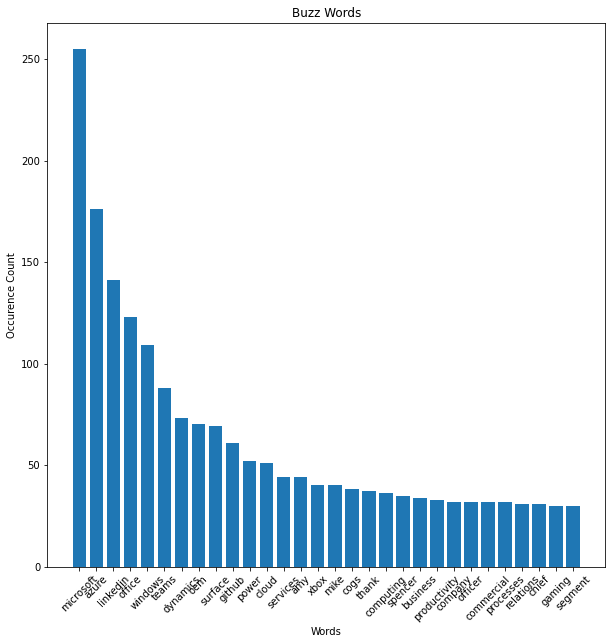

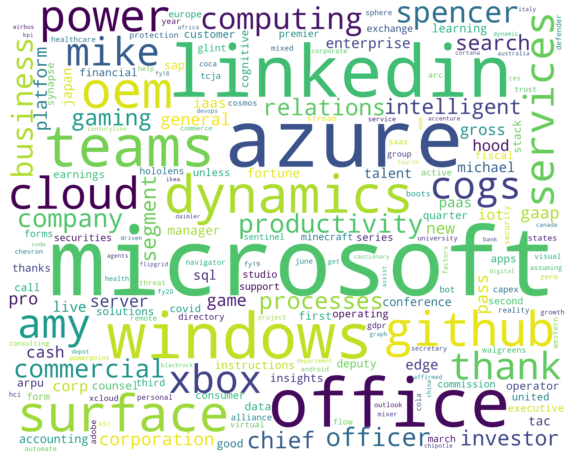

In [ ]:
#Plot of NNP
FUtil.ResultSummary(dict_combined_NNP,All_Details)

**#3.2 Summary of the content based on top keywords from 3.1**

***3.2.1. Acquire most common words***

In [ ]:
# #top words from previous NN and NNP list
Word_freq_NNP= Counter(dict_combined_NNP)
top_NNP=Word_freq_NNP.most_common(int(len(Word_freq_NNP)*0.05))  #top 5% which is 33
List_Words=[]
for value in top_NNP:
    List_Words.append(value[0]) #desc order

Word_freq_NN= Counter(dict_combined_NN)
top_NN=Word_freq_NN.most_common(int(len(Word_freq_NN)*0.05))
for value in top_NN:
  #combine distinct top words of NN and NNP
  [List_Words.append(value[0]) for x in value[0] if value[0] not in List_Words] 

# #Combine with customer words
Custom_Words=['Profit','Margin','Legal','Loss','Expenses','Xbox','Gaming']
for value in Custom_Words:
    [List_Words.append(value) for x in value if value not in List_Words] 

print(List_Words)

['microsoft', 'azure', 'linkedin', 'office', 'windows', 'teams', 'dynamics', 'oem', 'surface', 'github', 'power', 'cloud', 'amy', 'services', 'mike', 'xbox', 'cogs', 'thank', 'computing', 'spencer', 'business', 'productivity', 'commercial', 'company', 'officer', 'processes', 'chief', 'relations', 'gaming', 'intelligent', 'investor', 'search', 'segment', 'revenue', 'growth', 'currency', 'quarter', 'margin', 'year', 'call', 'demand', 'customer', 'income', 'mix', 'impact', 'rate', 'security', 'percentage', 'platform', 'expense', 'operating', 'line', 'today', 'performance', 'world', 'base', 'share', 'market', 'engagement', 'point', 'consumer', 'record', 'organization', 'opportunity', 'strength', 'flow', 'momentum', 'improvement', 'tax', 'innovation', 'server', 'value', 'work', 'Profit', 'Margin', 'Legal', 'Loss', 'Expenses', 'Xbox', 'Gaming']


***3.2.2. Define the number of sentences to summarize a single transcript***




```
# #5 methods to extract summary from texts   
#Extraction Methods
FUtil.Summarize_Content(filepath,Section,'LexRankSummarizer')    
FUtil.Summarize_Content(filepath,Section,'Gensim')
FUtil.Summarize_Content(filepath,Section,'LsaSummarizer')
FUtil.Summarize_Content(filepath,Section,'TextRankSummarizer')
FUtil.Summarize_Content(filepath,Section,'LuhnSummarizer')
```



In [ ]:
# #use 'LexRankSummarizer' to extract summary sentence from 'Microsoft Corporation_Q3 2018.txt' as an example
summary_sent_count=FUtil.Summarize_Sent_Count(filepath,'Exec Speech','LexRankSummarizer')

print('Number of summary sentences: ',summary_sent_count)

summary sentences count:  8


***3.2.3 Obtain summary text which is formed by sentences that have top words.***

In [ ]:
#file 'Microsoft Corporation_Q3 2018.txt' 
file = open(filepath, 'r')
Audio_Text=file.read()
file.close()

# #if the word is in this sentence, then add into 'sentences_with_word'
Sentences=sent_tokenize( FUtil.Get_Speech(Audio_Text) ) #Exec Section
sentences_with_word = []
for word in List_Words:    
    for sentence in Sentences:
        if sentence.count(word)>0:  #Is this word in this sentence? n/0
            sentences_with_word.append(sentence)

print(sentences_with_word )

['Along with healthy renewals, our sales teams and partners drove a higher volume of new business, leading to commercial bookings growth of 26% and 18% in constant currency.', 'As a reminder, under Accounting Standard 606, the Windows commercial growth rate will have significant variability quarter-to-quarter due to its relatively high mix of on-premises licensing revenue.Search revenue ex TAC grew 16% and 14% in constant currency with higher revenue per search and search volume driven by Bing performance in the US and international markets.Surface revenue grew 32% and 27% in constant currency with better than expected performance from Surface Book as we continued to transition to the latest products in our portfolio and against a prior year comparable impacted by product end-of-lifecycle dynamics.', 'Microsoft 365 helps every organization empower their employees with AI-backed tools that unlock creativity, increase teamwork and fuel innovation, all the while ensuring compliance and pr

In [ ]:
#obtain text that contains words in our list for one transcript
Custom_Content=' '.join(sentences_with_word)

print(Custom_Content)  

Along with healthy renewals, our sales teams and partners drove a higher volume of new business, leading to commercial bookings growth of 26% and 18% in constant currency. As a reminder, under Accounting Standard 606, the Windows commercial growth rate will have significant variability quarter-to-quarter due to its relatively high mix of on-premises licensing revenue.Search revenue ex TAC grew 16% and 14% in constant currency with higher revenue per search and search volume driven by Bing performance in the US and international markets.Surface revenue grew 32% and 27% in constant currency with better than expected performance from Surface Book as we continued to transition to the latest products in our portfolio and against a prior year comparable impacted by product end-of-lifecycle dynamics. Microsoft 365 helps every organization empower their employees with AI-backed tools that unlock creativity, increase teamwork and fuel innovation, all the while ensuring compliance and protecting

In [ ]:
# #Return sentences that are considered as text summarization
#Summarize the document with 5% sentences in Custom_Content by method 'TextRankSummarizer'
FUtil.Summarize_Content_Custom(Custom_Content,summary_sent_count,'TextRankSummarizer') 

As a reminder, under Accounting Standard 606, the Windows commercial growth rate will have significant variability quarter-to-quarter due to its relatively high mix of on-premises licensing revenue.Search revenue ex TAC grew 16% and 14% in constant currency with higher revenue per search and search volume driven by Bing performance in the US and international markets.Surface revenue grew 32% and 27% in constant currency with better than expected performance from Surface Book as we continued to transition to the latest products in our portfolio and against a prior year comparable impacted by product end-of-lifecycle dynamics.
We are up slightly year-over-year with improvement in our Productivity and Business Processes segment from Office 365 commercial and LinkedIn, offset by a decline in our intelligent cloud segment, driven by a greater mix of Azure revenue.FX positively impacted revenue growth by 1 point more than expected, 3 points at the Company and Productivity and Business Proces

#4.Check Sentiment Across Documents
Methods:
1.   PySentiment
2.   TextBlob
3.   Vader
4.   FinBert



About the Scoring

1. PySentiment

 The formula for Polarity is Polarity= (Positive-Negative)/(Positive+Negative).
 The formula for Subjectivity is Subjectivity= (Positive+Negative)/count(*)

2. Vader

 The 'compound' score in PySentiment is a 'normalized, weighted composite score' which is between -1 (most negative) and +1 (most positive). The 'pos', 'neu', and 'neg' scores are ratios for proportions of text that fall in each category (so these should all add up to be 1). 
   *   positive sentiment: compound score >= 0.05
   *   neutral sentiment:  -0.05 < compound score < 0.05
   *   negative sentiment: compound score <= -0.05

3. TextBlob

 The TextBlob returns the form Sentiment(polarity, subjectivity). The 'polarity' score is a float within the range [-1.0, 1.0]. The 'subjectivity' is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

4. FinBert

 FinBert returns tone probabilities for three labels {0:'neutral', 1:'positive',2:'negative'} , actual prediction and sentiment score (which is calculated with: probability of positive - probability of negative). Typical threshold values used in this code are:
  *   negative if score<-0.5
  *   positive if score>0.5
  *   neutral if score is between -0.5 and 0.5








In [ ]:
import datetime

#1.PySentiment https://pypi.org/project/pysentiment2/
!pip install pysentiment2
import pysentiment2 as ps
from functools import reduce
#2.Vader https://github.com/cjhutto/vaderSentiment
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#3.TextBlob https://textblob.readthedocs.io/en/dev/quickstart.html
from textblob import TextBlob

In [ ]:
#4.FinBert
import torch
!pip install pytorch_pretrained_bert
from pytorch_pretrained_bert.modeling import BertForSequenceClassification
from pytorch_pretrained_bert import BertTokenizer

labels = {0:'neutral', 1:'positive',2:'negative'}   

finbert_path_new = '/content/drive/MyDrive/Earnings_call_NLP/finbert/models'
finbert_model_new=BertForSequenceClassification.from_pretrained(finbert_path_new,num_labels=3)
finbert_path = '/content/drive/MyDrive/Earnings_call_NLP/finbert/models/pytorch_model.bin'

#finbert_state =torch.load(finbert_path,map_location='cuda:0'  )
#finbert_state = torch.load(finbert_path) #GPU
finbert_state =torch.load(finbert_path,map_location=torch.device('cpu')  ) 

finbert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=3)
finbert_model.load_state_dict(finbert_state)

from finbert.finbert.utils import * 
from finbert.finbert.finbert import * 

In [ ]:
# #initialize sentiment analysis model 
#1.PySentiment
lm = ps.LM() #PySent intializer
#2.Vader
analyzer = SentimentIntensityAnalyzer() #Vader initializer
#3.TextBlob
#4.FinBert

**#4.1 Get scores for the content**

In [ ]:
Scores={}  #score of Q&A+Exec section 
Exec_Score={} #score of Exec section 
QA_Score={}  #score of Q&A section 

df = pd.DataFrame( columns={"Total_Score","Sentence_Score"} )
l_Score=[pd.DataFrame()]

#StockReturns={}
for i in range(len(Stock_Tickers)):   
    symbol=Stock_Tickers['Symbol'][i]
    Scores[symbol] = {}
    Exec_Score[symbol] = {}
    QA_Score[symbol] = {}
    #StockReturns[symbol] = pd.DataFrame(columns={"Date","Returns"})

    directory='/content/drive/MyDrive/Earnings_call_NLP/AlphaStreet/S&P 500/'+str(symbol)
    for filename in os.listdir(directory): 
        qtr=filename[len(filename)-11:len(filename)-4]  #quarter of the year 

        # #build data frame for each quarter time of one stock
        #Score Dataset
        Scores[symbol][qtr]={} 
        Scores[symbol][qtr]["Total_Score"]={}
        Scores[symbol][qtr]["Sentence_Score"]={}
        Scores[symbol][qtr]["Sentence_Score"]["PySentiment"]=[]
        Scores[symbol][qtr]["Sentence_Score"]["Vader"]=[]
        Scores[symbol][qtr]["Sentence_Score"]["TextBlob"]=[]
        Scores[symbol][qtr]["Sentence_Score"]["FinBert"]=[]
        #Exec Score Dataset
        Exec_Score[symbol][qtr]={}
        Exec_Score[symbol][qtr]["Total_Score"]={}
        Exec_Score[symbol][qtr]["Sentence_Score"]={}
        Exec_Score[symbol][qtr]["Sentence_Score"]["PySentiment"]=[]
        Exec_Score[symbol][qtr]["Sentence_Score"]["Vader"]=[]
        Exec_Score[symbol][qtr]["Sentence_Score"]["TextBlob"]=[]
        Exec_Score[symbol][qtr]["Sentence_Score"]["FinBert"]=[]
        #QA_Score Dataset
        QA_Score[symbol][qtr]={}
        QA_Score[symbol][qtr]["Total_Score"]={}
        QA_Score[symbol][qtr]["Sentence_Score"]={}
        QA_Score[symbol][qtr]["Sentence_Score"]["PySentiment"]=[]
        QA_Score[symbol][qtr]["Sentence_Score"]["Vader"]=[]
        QA_Score[symbol][qtr]["Sentence_Score"]["TextBlob"]=[]
        QA_Score[symbol][qtr]["Sentence_Score"]["FinBert"]=[]

      
        Filename= os.path.join(directory, filename)
        file = open(Filename, 'r')
        Audio_Text=file.read()
        file.close()

        #Record the stock info after releasing earning calls
        start_tag=Audio_Text.find('dateModified')
        end_tag=Audio_Text.find('url')
        Earning_Date=Audio_Text[(start_tag+15):(end_tag-3)]
        date=pd.to_datetime(Earning_Date).date()
        StockReturns[symbol]=StockReturns[symbol].append({'Date':date,
                                                          'Returns':Stock_Data[symbol].loc[date].Returns
                                                          },ignore_index = True)
        

        # #Sentiment Analysis

        # #I.Section level
        #Q&A Section
        QA_Audio_Text=FUtil.Get_QA(Audio_Text) 
        #1.PySentiment   
        tokens=lm.tokenize(QA_Audio_Text)
        QA_Score[symbol][qtr]["Total_Score"]["PySentiment"]=lm.get_score(tokens)
        #2.Vader
        QA_Score[symbol][qtr]["Total_Score"]["Vader"]=analyzer.polarity_scores(QA_Audio_Text)        
        #3.TextBlob
        score = TextBlob(reduce(lambda i, j: i + j, QA_Audio_Text)).sentiment        
        QA_Score[symbol][qtr]["Total_Score"]["TextBlob"]=dict((score.index(i),i) for i in score)
        #4.FinBert
        QA_Score[symbol][qtr]["Total_Score"]["FinBert"]=predict(QA_Audio_Text,finbert_model)

        #Exec Section
        Exec_Audio_Text=FUtil.Get_Speech(Audio_Text)
        #1.PySentiment
        tokens=lm.tokenize(Exec_Audio_Text)
        Exec_Score[symbol][qtr]["Total_Score"]["PySentiment"]=lm.get_score(tokens)
        #2.Vader
        Exec_Score[symbol][qtr]["Total_Score"]["Vader"]=analyzer.polarity_scores(Exec_Audio_Text)                   
        #3.TextBlob
        score = TextBlob(reduce(lambda i, j: i + j, Exec_Audio_Text)).sentiment       
        Exec_Score[symbol][qtr]["Total_Score"]["TextBlob"]=dict((score.index(i),i) for i in score)
        #4.FinBert
        Exec_Score[symbol][qtr]["Total_Score"]["FinBert"]=predict(Exec_Audio_Text,finbert_model)
                  
        #Whole Text
        tokens=lm.tokenize(Audio_Text)
        #1.PySentiment
        Scores[symbol][qtr]["Total_Score"]["PySentiment"]=lm.get_score(tokens)
        #2.Vader
        Scores[symbol][qtr]["Total_Score"]["Vader"]=analyzer.polarity_scores(Audio_Text)        
        #3.TextBlob
        score = TextBlob(reduce(lambda i, j: i + j, Audio_Text)).sentiment
        Scores[symbol][qtr]["Total_Score"]["TextBlob"]=dict((score.index(i),i) for i in score)
        #4.FinBert
        Scores[symbol][qtr]["Total_Score"]["FinBert"]=pd.concat( [Exec_Score[symbol][qtr]["Total_Score"]["FinBert"],QA_Score[symbol][qtr]["Total_Score"]["FinBert"]])
        #frames = [Exec_Score[symbol][qtr]["Total_Score"]["FinBert"], QA_Score[symbol][qtr]["Total_Score"]["FinBert"]]
        #Scores[symbol][qtr]["Total_Score"]["FinBert"]= pd.concat(frames)                                                                                                                                              
        

        # #II.Sentence level
        #Q&A Section
        QA_sentences = sent_tokenize(QA_Audio_Text)
        for sentence in QA_sentences:
            #1.PySentiment
            tokens=lm.tokenize(sentence)
            score = lm.get_score(tokens)
            score.update(Sentence=sentence)
            Scores[symbol][qtr]["Sentence_Score"]["PySentiment"].append(score)
            QA_Score[symbol][qtr]["Sentence_Score"]["PySentiment"].append(score)
            #2.Vader
            score = analyzer.polarity_scores(sentence)
            score.update(Sentence=sentence)
            Scores[symbol][qtr]["Sentence_Score"]["Vader"].append(score)
            QA_Score[symbol][qtr]["Sentence_Score"]["Vader"].append(score)
            #3.TextBlob
            score = TextBlob(reduce(lambda i, j: i + j, sentence)).sentiment
            score=dict((score.index(i),i) for i in score)
            score.update(Sentence=sentence)
            Scores[symbol][qtr]["Sentence_Score"]["TextBlob"].append(score) 
            QA_Score[symbol][qtr]["Sentence_Score"]["TextBlob"].append(score)
            #4.Finbert( Finbert analyses on sentence level)
        QA_Score[symbol][qtr]["Sentence_Score"]["FinBert"].append(QA_Score[symbol][qtr]["Total_Score"]["FinBert"])

        #Exec Section
        Exec_sentences = sent_tokenize(Exec_Audio_Text)        
        for sentence in Exec_sentences:
            #1.PySentiment
            tokens=lm.tokenize(sentence)
            score = lm.get_score(tokens)
            score.update(Sentence=sentence)
            Scores[symbol][qtr]["Sentence_Score"]["PySentiment"].append(score)
            Exec_Score[symbol][qtr]["Sentence_Score"]["PySentiment"].append(score)
            #2.Vader
            score = analyzer.polarity_scores(sentence)
            score.update(Sentence=sentence)
            Scores[symbol][qtr]["Sentence_Score"]["Vader"].append(score)
            Exec_Score[symbol][qtr]["Sentence_Score"]["Vader"].append(score)
            #3.TextBlob
            score = TextBlob(reduce(lambda i, j: i + j, sentence)).sentiment
            score=dict((score.index(i),i) for i in score)
            score.update(Sentence=sentence)
            Scores[symbol][qtr]["Sentence_Score"]["TextBlob"].append(score) 
            Exec_Score[symbol][qtr]["Sentence_Score"]["TextBlob"].append(score)       
            #4.FinBert( Finbert analyses on sentence level)
        Exec_Score[symbol][qtr]["Sentence_Score"]["FinBert"].append(Exec_Score[symbol][qtr]["Total_Score"]["FinBert"])
        #QA_Score[symbol][qtr]["Sentence_Score"]["FinBert"].append(QA_Score[symbol][qtr]["Total_Score"]["FinBert"])

        Scores[symbol][qtr]["Sentence_Score"]["FinBert"].append(Scores[symbol][qtr]["Total_Score"]["FinBert"]) 


In [ ]:
print(Exec_Score)

**#4.2 Show the progress and scores of the earning call across models**

In [ ]:
def Get_SentimentProgress(Sentence_Scores,Stock_Ticker,Filename):  
    qtr=Filename[len(Filename)-11:len(Filename)-4]
    Sentiement_Progress=pd.DataFrame(columns=["PySentiment_Sentiment","TextBlob_Sentiment","Vader_Sentiment","FinBert_Sentiment"])

    Sentences=Sentence_Scores[Stock_Ticker][qtr]["Sentence_Score"]["FinBert"][0]['sentence']
    Sentence_Base=Sentence_Scores[Stock_Ticker][qtr]["Sentence_Score"]
    counter=0
    for sentence in Sentences:
        Sentiement_Progress=Sentiement_Progress.append({"PySentiment_Sentiment":0,
                                                        "TextBlob_Sentiment":0,
                                                        "Vader_Sentiment":0,
                                                        "FinBert_Sentiment":0
                                                        },ignore_index = True)
        #1
        temp=Sentence_Base['PySentiment'][counter]['Polarity']
        Sentiement_Progress["PySentiment_Sentiment"][counter]=-1 if float(temp)<-0.05 else  (1 if float(temp)>0.05 else 0)
        #2
        temp=Sentence_Base['TextBlob'][counter][0]
        Sentiement_Progress["TextBlob_Sentiment"][counter]=-1 if float(temp)<-0.05 else  (1 if float(temp)>0.05 else 0)
        #3
        temp=Sentence_Base['Vader'][counter]['compound']
        Sentiement_Progress["Vader_Sentiment"][counter]=-1 if float(temp)<-0.05 else  (1 if float(temp)>0.05 else 0)
        #4
        temp=Sentence_Base['FinBert'][0]['prediction'][counter]
        Sentiement_Progress["FinBert_Sentiment"][counter]=-1 if str(temp)=="negative" else  (1 if str(temp)=="positive" else 0)
        
        counter+=1
    
    Sentiement_Progress=Sentiement_Progress.cumsum(axis=0) #Accumulate by row
    ax = Sentiement_Progress.plot()
    ax.set_xlabel("Meeting Progress", labelpad=5, weight='bold', size=8)
    ax.set_ylabel("Sentiment Level", labelpad=5, weight='bold', size=8)
    ax.set_title('Comparison of Sentiment Scores ',weight='bold', size=12)

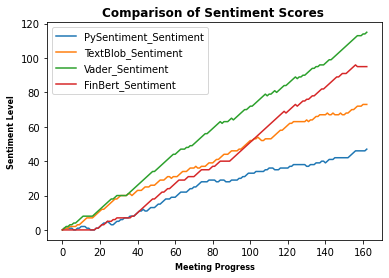

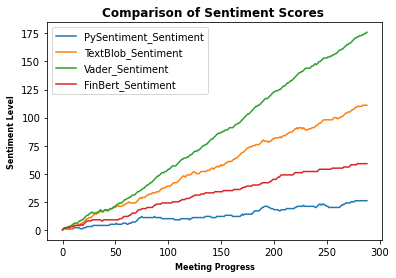

In [ ]:
Get_SentimentProgress(Exec_Score,Stock_Ticker='MSFT',Filename='Microsoft Corporation_Q3 2018.txt')
Get_SentimentProgress(QA_Score,Stock_Ticker='MSFT',Filename='Microsoft Corporation_Q3 2018.txt')

Among the 4 methods, Finbert gains a faster and better performance growing when the counter increases. The growing lines in different sections as shown above share a similar trend and divergence.

#5.Compare the performance of  4 analysis methods based on the labeled dataset

In [ ]:
# #Test on https://sites.google.com/view/fiqa Challenge dataset.
#load JSON file 
import json 
with open('/content/drive/MyDrive/Earnings_call_NLP/task1_post_ABSA_train.json',encoding="utf8") as json_file: 
     data = json.load(json_file) 

print(data)

{'14860': {'sentence': 'Slowly adding some $FIO here but gotta be careful. This will be one of biggest winners in 2012', 'info': [{'snippets': "['Slowly adding some $FIO here but gotta be careful']", 'sentiment_score': '0.459', 'target': 'FIO', 'aspects': "['Stock/Price Action/Bullish/Bull Position']"}]}, '14864': {'sentence': '$TRX http://stks.co/1KkK Long setup. MACD cross.', 'info': [{'snippets': "['Long setup. MACD cross.']", 'sentiment_score': '0.438', 'target': 'TRX', 'aspects': "['Stock/Technical Analysis']"}]}, '14867': {'sentence': 'I am not optimistic about $amzn both fundementals and charts look like poopoo this quarter.', 'info': [{'snippets': "['both fundementals and charts look like poopoo this quarter.']", 'sentiment_score': '-0.506', 'target': 'AMZN', 'aspects': "['Stock/Price Action/Bearish']"}]}, '14875': {'sentence': '$GRPN might be selling off ahead of $P earnings...', 'info': [{'snippets': "['might be selling off ahead']", 'sentiment_score': '-0.202', 'target': 'P'

In [ ]:
Benchmark_Scores=pd.DataFrame(columns=["Sentence","Aspect","Actual_Score","Actual_Sentiment","PySentiment_Score","PySentiment_Sentiment","TextBlob_Score","TextBlob_Sentiment","Vader_Score","Vader_Sentiment","FinBert_Score","FinBert_Sentiment"])
counter=0
for key in data:  
    if(counter<len(data)): 
        Benchmark_Scores=Benchmark_Scores.append({"Sentence":data[key]['sentence'],
                                                  "Aspect":data[key]['info'][0]['aspects'],
                                                  "Actual_Score":data[key]['info'][0]['sentiment_score'],
                                                  "Actual_Sentiment":"",
                                                  "PySentiment_Score":"",
                                                  "PySentiment_Sentiment":"",
                                                  "TextBlob_Score":"",
                                                  "TextBlob_Sentiment":"",
                                                  "Vader_Score":"",
                                                  "Vader_Sentiment":"",
                                                  "FinBert_Score":"",
                                                  "FinBert_Sentiment":""
                                                  },ignore_index = True)
        #tag "Actual_Sentiment" to the data based on the "Actual_Score"
        Benchmark_Scores["Actual_Sentiment"][counter]="negative" if float(Benchmark_Scores["Actual_Score"][counter])<-0.5 else  ("positive" if float(Benchmark_Scores["Actual_Score"][counter])>0.5 else "neutral")
        
        sent=data[key]['sentence']
        #1 PySentiment
        tokens=lm.tokenize(sent)
        Benchmark_Scores["PySentiment_Score"][counter]=lm.get_score(tokens)['Polarity']
        PySentiment_S=Benchmark_Scores["PySentiment_Score"][counter]
        Benchmark_Scores["PySentiment_Sentiment"][counter]="negative" if float(PySentiment_S)<-0.05 else  ("positive" if float(PySentiment_S)>0.05 else "neutral")
        #2 TextBlob
        score = TextBlob( reduce(lambda i, j: i + j, sent) ).sentiment
        Benchmark_Scores["TextBlob_Score"][counter]=dict((score.index(i),i) for i in score)[0]
        TextBlob_S=Benchmark_Scores["TextBlob_Score"][counter]
        Benchmark_Scores["TextBlob_Sentiment"][counter]="negative" if float(TextBlob_S)<-0.05 else  ("positive" if float(TextBlob_S)>0.05 else "neutral")
        #3 Vader
        Benchmark_Scores["Vader_Score"][counter]=analyzer.polarity_scores(sent)['compound']
        Vader_S=Benchmark_Scores["Vader_Score"][counter]
        Benchmark_Scores["Vader_Sentiment"][counter]="negative" if float(Vader_S)<-0.05 else  ("positive" if float(Vader_S)>0.05 else "neutral")
        #4 FinBert
        result=predict( sent,finbert_model_new )  #predict(text,model)
        if(len(result['sentiment_score'])>1):           
            Benchmark_Scores["FinBert_Score"][counter]=( result['sentiment_score'][0]+result['sentiment_score'][1] )/2
            FinBert_S=Benchmark_Scores["FinBert_Score"][counter]
            Benchmark_Scores["FinBert_Sentiment"][counter]="negative" if float(FinBert_S)<-0.5 else  ("positive" if float(FinBert_S)>0.5 else "neutral") 
        else:
            Benchmark_Scores["FinBert_Score"][counter]=result['sentiment_score'][0]
            FinBert_S=Benchmark_Scores["FinBert_Score"][counter]
            Benchmark_Scores["FinBert_Sentiment"][counter]="negative" if float(FinBert_S)<-0.5 else  ("positive" if float(FinBert_S)>0.5 else "neutral") 
        
        counter+=1

In [ ]:
# #Metrics to evaluate accuarcy of tone: RMSE and Accuracy
RMSE,Accuracy=FUtil.Calculate_Accuracy(Benchmark_Scores)

Accuracy_Score=[ RMSE.transpose(), Accuracy.transpose() ] 
Accuracy_Score = pd.concat(Accuracy_Score,axis=1, join='inner')
Accuracy_Score.columns=["RMSE","Accuracy"]

print(Accuracy_Score)

                 RMSE  Accuracy
PySentiment  0.646487  0.530370
TextBlob     0.436996  0.463704
Vader        0.465901  0.388148
FinBert      0.488383  0.579259


Text(0.5, 1.0, 'Performance Comparison of Sentiment Analysers')

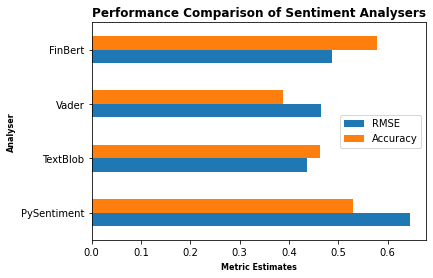

In [ ]:
# #Compare analysis accuracy by bar plot
ax = Score_Appended.plot.barh()
ax.set_xlabel("Metric Estimates", labelpad=5, weight='bold', size=8)
ax.set_ylabel("Analyser", labelpad=5, weight='bold', size=8)
ax.set_title('Performance Comparison of Sentiment Analysers',weight='bold', size=12)

Finbert enjoys high accuracy and an acceptable error rate at the same time.

#6.Potential sentiments analyser results using Finbert model


In [ ]:
# #FinBert model set up
import torch
#!pip install pytorch_pretrained_bert
from pytorch_pretrained_bert.modeling import BertForSequenceClassification
from pytorch_pretrained_bert import BertTokenizer

labels = {0:'neutral', 1:'positive',2:'negative'}   

finbert_path_new = '/content/drive/MyDrive/Earnings_call_NLP/finbert/models'
finbert_model_new=BertForSequenceClassification.from_pretrained(finbert_path_new,num_labels=3)
finbert_path = '/content/drive/MyDrive/Earnings_call_NLP/finbert/models/pytorch_model.bin'
#finbert_state = torch.load(finbert_path)
#finbert_state =torch.load(finbert_path,map_location='cuda:0'  )
finbert_state =torch.load(finbert_path,map_location=torch.device('cpu')  ) 

finbert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=3)
finbert_model.load_state_dict(finbert_state)

from finbert.finbert.utils import * 
from finbert.finbert.finbert import * 

In [ ]:
Scores={}
Exec_Score={}
QA_Score={}
StockReturns={}
for i in range(len(Stock_Tickers)):
    symbol=Stock_Tickers['Symbol'][i]

    Scores[symbol] = {}
    Exec_Score[symbol] = {}
    QA_Score[symbol] = {}
    StockReturns[symbol] = pd.DataFrame( columns={"Date","Returns","Earnings Call"} )

    directory='/content/drive/MyDrive/Earnings_call_NLP/AlphaStreet/S&P 500/'+str(symbol)
    for filename in os.listdir(directory): 
        # #initialize Score Dataset
        qtr=filename[len(filename)-11:len(filename)-4]
        #Whole Text ScoreDataset 
        Scores[symbol][qtr]={}
        Scores[symbol][qtr]["Total_Score"]={}
        Scores[symbol][qtr]["Sentence_Score"]={}
        Scores[symbol][qtr]["Sentence_Score"]["FinBert"]=[]        
        #Exec Score Dataset
        Exec_Score[symbol][qtr]={}
        Exec_Score[symbol][qtr]["Total_Score"]={}
        Exec_Score[symbol][qtr]["Sentence_Score"]={}
        Exec_Score[symbol][qtr]["Sentence_Score"]["FinBert"]=[]
        #QA_Score Dataset
        QA_Score[symbol][qtr]={}
        QA_Score[symbol][qtr]["Total_Score"]={}
        QA_Score[symbol][qtr]["Sentence_Score"]={}
        QA_Score[symbol][qtr]["Sentence_Score"]["FinBert"]=[]
        
        
        Filename=  os.path.join(directory, filename)
        file = open(Filename, 'r')
        Audio_Text=file.read()
        file.close()
        
        # #Stock returns on the next days post earning call
        start_tag=Audio_Text.find('dateModified')
        end_tag=Audio_Text.find('url')
        Earning_Date=Audio_Text[(start_tag+15):(end_tag-3)]
        time=pd.to_datetime(Earning_Date).date()
        StockReturns[symbol]=StockReturns[symbol].append({'Date':time,
                                                          'Returns':Stock_Data[symbol].loc[time].Returns,
                                                          'Earnings Call':Earning_Date
                                                          },ignore_index = True)
       
        # #FinBert method to do predication
        #Q&A section
        QA_Audio_Text=FUtil.Get_QA(Audio_Text)                  
        QA_Score[symbol][qtr]["Sentence_Score"]["FinBert"]=predict(QA_Audio_Text,finbert_model)   
        #record the total number for each sentiment   
        #'prediction' has 3 labels = {0:'neutral', 1:'positive',2:'negative'}      
        Count=QA_Score[symbol][qtr]["Sentence_Score"]["FinBert"].groupby(["prediction"]).size().reset_index(name="Count")
        pred=Count['prediction'] 
        QA_Score[symbol][qtr]["Total_Score"]["Positive"]=0 if (Count.loc[pred == 'positive',"Count"].empty) else Count.loc[pred == 'positive',"Count"].iloc[0]
        QA_Score[symbol][qtr]["Total_Score"]["Negative"]=0 if (Count.loc[pred == 'negative',"Count"].empty) else Count.loc[pred == 'negative',"Count"].iloc[0]
        QA_Score[symbol][qtr]["Total_Score"]["Neutral"]=0 if (Count.loc[pred == 'neutral',"Count"].empty) else Count.loc[pred == 'neutral',"Count"].iloc[0]
        #Exec section
        Exec_Audio_Text=FUtil.Get_Speech(Audio_Text)
        Exec_Score[symbol][qtr]["Sentence_Score"]["FinBert"]=predict(Exec_Audio_Text,finbert_model)
        Count=Exec_Score[symbol][qtr]["Sentence_Score"]["FinBert"].groupby(["prediction"]).size().reset_index(name="Count")
        pred=Count['prediction'] 
        Exec_Score[symbol][qtr]["Total_Score"]["Positive"]=0 if (Count.loc[pred == 'positive',"Count"].empty) else Count.loc[pred== 'positive',"Count"].iloc[0]
        Exec_Score[symbol][qtr]["Total_Score"]["Negative"]=0 if (Count.loc[pred == 'negative',"Count"].empty) else Count.loc[pred == 'negative',"Count"].iloc[0]
        Exec_Score[symbol][qtr]["Total_Score"]["Neutral"]=0 if (Count.loc[pred== 'neutral',"Count"].empty) else Count.loc[pred== 'neutral',"Count"].iloc[0]
        #Whole Text Section: combine Q&A and Exec sections
        Scores[symbol][qtr]["Sentence_Score"]["FinBert"]=pd.concat([Exec_Score[symbol][qtr]["Sentence_Score"]["FinBert"],
                                                                    QA_Score[symbol][qtr]["Sentence_Score"]["FinBert"]])                                          
        Count=Scores[symbol][qtr]["Sentence_Score"]["FinBert"].groupby(["prediction"]).size().reset_index(name="Count")
        pred=Count['prediction']
        #sum up each sentiment class in Q&A and Exec sections
        Scores[symbol][qtr]["Total_Score"]["Positive"]=0 if (Count.loc[pred == 'positive',"Count"].empty) else Count.loc[pred == 'positive',"Count"].iloc[0]
        Scores[symbol][qtr]["Total_Score"]["Negative"]=0 if (Count.loc[pred == 'negative',"Count"].empty) else Count.loc[pred == 'negative',"Count"].iloc[0]
        Scores[symbol][qtr]["Total_Score"]["Neutral"]=0 if (Count.loc[pred== 'neutral',"Count"].empty) else Count.loc[pred == 'neutral',"Count"].iloc[0]



In [ ]:
#stock returns after releasing earning calls
print(StockReturns)

{'MSFT':                Earnings Call   Returns        Date
0   2021-01-26T22:30:00+0000  0.002025  2021-01-26
1   2020-10-27T21:30:00+0000  0.007815  2020-10-27
2   2020-07-22T21:30:00+0000  0.012116  2020-07-22
3   2020-04-29T21:30:00+0000  0.024014  2020-04-29
4   2020-01-29T22:30:00+0000  0.001191  2020-01-29
5   2019-10-23T21:30:00+0000  0.002627  2019-10-23
6   2019-07-18T21:30:00+0000  0.006398  2019-07-18
7   2019-04-24T21:30:00+0000 -0.006220  2019-04-24
8   2019-01-30T22:30:00+0000  0.016683  2019-01-30
9   2018-10-24T21:30:00+0000 -0.057815  2018-10-24
10  2018-07-19T21:30:00+0000 -0.005064  2018-07-19
11  2018-04-26T21:30:00+0000  0.007561  2018-04-26}


***#Display Finbert sentiment analysis***

In [ ]:
# #for example: the earning call for 3rd quarter of 2018
qtr='Q3 2018'
#sentiment analysis on sentence level
print(Scores[symbol][qtr]["Sentence_Score"]["FinBert"])

                                              sentence  ... sentiment_score
0    structions) As a reminder, this conference is ...  ...        0.021644
1    It is now my pleasure to introduce your host, ...  ...        0.076295
2                                           Thank you.  ...        0.238600
3                                       You may begin.  ...        0.061403
4    Mike Spencer - Microsoft Corp. Good afternoon ...  ...        0.103033
..                                                 ...  ...             ...
284                                  Thanks, everyone.  ...        0.195907
285                    Satya Nadella - Microsoft Corp.  ...        0.003122
286                               Thank you, everyone.  ...        0.131360
287  operator -  Ladies and gentlemen, this does co...  ...        0.035938
288  Again, we thank you for your participation, an...  ...        0.147161

[452 rows x 4 columns]


In [ ]:
#Total counts for each tone in the earning call of 3rd quarter in 2018
print(Scores[symbol][qtr]["Total_Score"])

{'Positive': 159, 'Negative': 5, 'Neutral': 288}
